# Directly edit the model cache

In [1]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import neuronunit
from neuronunit.models.reduced import ReducedModel

In [2]:
NU = neuronunit.__path__[0]
model_path = os.path.join(NU, 'models/NeuroML2/LEMS_2007One.xml')
model = ReducedModel(model_path, backend='jNeuroML')

In [3]:
# Run the simulation once just to get all run parameters in order
vm = model.get_membrane_potential()

pyNeuroML >>> Reloading data specified in LEMS file: /tmp/tmp5lnjvnx3/LEMS_2007One.xml (/tmp/tmp5lnjvnx3/LEMS_2007One.xml), base_dir: /tmp/tmpm2wc6zxz, cwd: /mnt/c/Users/Rick Gerkin/Dropbox (ASU)/dev/scidash/neuronunit/neuronunit/unit_test


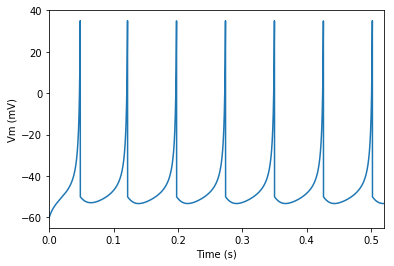

In [4]:
# This is what the real simulation looks like
model.plot_membrane_potential()

In [5]:
# A hash describing the current state of the model
key = model.hash

In [6]:
# Some fake results
results = {'v': [1,2,3,4,5],
           't': [0.0,0.1,0.2,0.3,0.4]}

In [7]:
# Overwrite the real results with these fakes ones
model._backend.set_memory_cache(results)

In [8]:
# Check that they have been written
model._backend.get_memory_cache()

{'t': [0.0, 0.1, 0.2, 0.3, 0.4], 'v': [1, 2, 3, 4, 5]}

In [9]:
# Check that they were written to an entry indexed by the current model hash
model._backend.get_memory_cache(key=model.hash)

{'t': [0.0, 0.1, 0.2, 0.3, 0.4], 'v': [1, 2, 3, 4, 5]}

In [10]:
# Request the results again.  
# Since the model hash is unchanged, it will look in the cache and return the fake values
vm = model.get_membrane_potential()

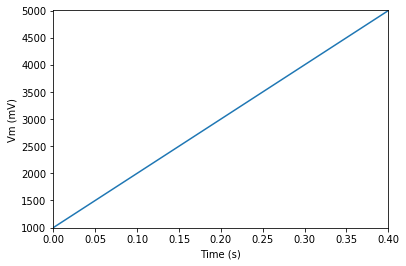

In [11]:
# Plot those fake values
model.plot_membrane_potential()